<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/Arbol_De_Decision_primer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

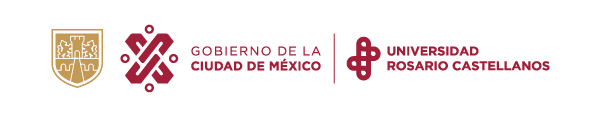

**Actualizado:** Noviembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de un árbol de decisión en un ejemplo simple en Python.   

## Árboles de Decisión

### Introducción

Los árboles de decisión son un algoritmo ampliamente utilizado para la clasificación y regresión de datos.  


Son modelos predictivos que utilizan una estructura similar a un árbol para tomar decisiones basadas en características o atributos de los datos de entrada

**Remark.**  


Un árbol es un tipo de grafo cuyos vértices (nodos) están conectados exactamente por un camino (ramas), es decir, de un nodo a otro solo podemos llegar de una manera (Ver la siguiente imagen)

Binary_tree.svg

A diferencia de los modelos lineales, mapean bastante bien las relaciones no lineales. Son adaptables para resolver cualquier tipo de problema clasificación o regresión.

### Estructura de los árboles de decisión

Un árbol de decisión, esta compuesto por nodos que representan decisiones o acciones, y ramas que representan las posibles consecuencias de esas decisiones.


En este contexto, un árbol de decisión se construye a partir de un conjunto de datos de entrenamiento, donde cada instancia se caracteriza por un conjunto de atributos y una etiqueta de clase.


El objetivo principal de un árbol de decisión, es aprender las reglas o los patrones en los datos que permitan predecir la etiqueta de clase de nuevas instancias (valores no entrenados).


Con este fin, el árbol se construye de forma recursiva dividiendo el conjunto de datos en subconjuntos más pequeños utilizando diferentes atributos como criterios de división.


Estos atributos se seleccionan de acuerdo a la medida de impureza o ganancia de información que proporcionan.



### Graficando un árbol con NetworkX

Importamos los módulos necesarios

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

 Crear un grafo dirigido con `NetworkX`

In [ ]:
G = nx.DiGraph()

Agregar nodos al grafo

In [ ]:
# Creamos el nodo raíz
G.add_node("R")
# Creamos los nodos
G.add_node("N1")
G.add_node("N2")
# Creamos las hojas
G.add_node("H1")
G.add_node("H2")
G.add_node("H3")

Agregar los vértices entre los nodos definidos

In [ ]:
G.add_edge("R", "N1")
G.add_edge("R", "N2")
G.add_edge("N1", "H1")
G.add_edge("N1", "H2")
G.add_edge("N2", "H3")

Preparamos el ambiente para dibujar el árbol

In [ ]:
# Diseño del gráfico
pos = nx.spring_layout(G)
# Etiquetas de los nodos
labels = {node: node for node in G.nodes()}

Dibujamos el árbol

In [ ]:
# Dibujar nodos y bordes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels)

# Desactivar ejes
plt.axis("off")
plt.show()

### Ejemplo de implementación de un árbol de decisión en Python

El objetivo es construir un árbol de decisión para determinar si un usuario es candidato a una tarjeta de crédito.





En este caso, utilizamos una lista de datos de entrenamiento y una función para tomar decisiones basada en las características del usuario.


Supongamos que tenemos los siguientes datos de entrenamiento:  


| ingreso_anual | historial_crediticio | edad | es_candidato |
|---------------|----------------------|------|--------------|
| 60000         | 750                  | 30   | Candidato Aceptado |
| 45000         | 680                  | 28   | Candidato Rechazado |
| 55000         | 720                  | 32   | Candidato Aceptado |
| 48000         | 690                  | 24   | Candidato Rechazado |



Construiremos un árbol de decisión sencillo para determinar si un usuario es candidato a una tarjeta de crédito.



Comenzamos con un nodo raíz que contiene todos los datos.

In [ ]:
# Datos de entrenamiento
datos_entrenamiento = [
    {"ingreso_anual": 60000, "historial_crediticio": 750, "edad": 30, "es_candidato": "Candidato Aceptado"},
    {"ingreso_anual": 45000, "historial_crediticio": 680, "edad": 28, "es_candidato": "Candidato Rechazado"},
    {"ingreso_anual": 55000, "historial_crediticio": 720, "edad": 32, "es_candidato": "Candidato Aceptado"},
    {"ingreso_anual": 48000, "historial_crediticio": 690, "edad": 24, "es_candidato": "Candidato Rechazado"},
]

Cada diccionario representa un usuario y contiene tres características: `ingreso_anual`, `historial_crediticio` y `edad`.  

Además de la etiqueta `es_candidato`, que indica si el usuario es un `Candidato Aceptado` o `Candidato Rechazado`.

Inicializar valores límite

In [ ]:
ingreso_limite = float('inf')
historial_limite = float('-inf')
edad_limite = float('-inf')

Inicializamos las variables `ingreso_limite`, `historial_limite` y `edad_limite` con valores extremos para garantizar que los primeros datos del entrenamiento ajustarán los límites correctamente.

Lógica para determinar si un usuario es candidato o no.

In [ ]:
# Función para determinar si un usuario es candidato a una tarjeta de crédito
def es_candidato(ingreso, historial, edad):
    if ingreso >= ingreso_limite:
        if historial >= historial_limite:
            if edad >= edad_limite:
                return "Candidato Aceptado"
            else:
                return "Candidato Rechazado"
        else:
            return "Candidato Rechazado"
    else:
        return "Candidato Rechazado"

La función `es_candidato` toma tres argumentos: `ingreso`, `historial` y `edad`.

La función compara estos valores con los límites (`ingreso_limite`, `historial_limite` y `edad_limite`) y devuelve la etiqueta `Candidato Aceptado` o `Candidato Rechazado` en función de si se cumplen las condiciones.

Entrenamiento del modelo

In [ ]:
# Ajustamos los valores límite en función de los datos de entrenamiento.
for dato in datos_entrenamiento:
    ingreso_entrenamiento = dato["ingreso_anual"]
    historial_entrenamiento = dato["historial_crediticio"]
    edad_entrenamiento = dato["edad"]
    decision_entrenamiento = dato["es_candidato"]

    if decision_entrenamiento == "Candidato Aceptado":
        if ingreso_entrenamiento < ingreso_limite:
            ingreso_limite = ingreso_entrenamiento
        if historial_entrenamiento > historial_limite:
            historial_limite = historial_entrenamiento
        if edad_entrenamiento > edad_limite:
            edad_limite = edad_entrenamiento
    else:
        if ingreso_entrenamiento > ingreso_limite:
            ingreso_limite = ingreso_entrenamiento
        if historial_entrenamiento < historial_limite:
            historial_limite = historial_entrenamiento
        if edad_entrenamiento < edad_limite:
            edad_limite = edad_entrenamiento
    print(
        f"Ajuste del ingreso_limite: {ingreso_limite}\n"
        f"Ajuste del historial_limite: {historial_limite}\n"
        f"Ajuste de la edad_limite: {edad_limite}\n"
    )


En esta parte del código, iteramos a través de los datos de entrenamiento.

Dependiendo de si un usuario es `Candidato Aceptado` o `Candidato Rechazado` ajustamos los valores límite (`ingreso_limite`, `historial_limite` y `edad_limite`) para reflejar mejor las condiciones de aprobación o rechazo.

Esto simula el proceso de entrenamiento de un modelo de árbol de decisión.

Predicción del modelo

In [ ]:
# Ejemplo de uso con datos de prueba
nuevo_usuario = {
    "ingreso_anual": 60000,
    "historial_crediticio": 700,
    "edad": 26
}
decision = es_candidato(
    nuevo_usuario["ingreso_anual"], nuevo_usuario["historial_crediticio"], nuevo_usuario["edad"]
)
print(f"¿Es candidato a una tarjeta de crédito? {decision}")

Evaluamos a un nuevo usuario con datos de prueba utilizando la función `es_candidato` y mostramos la decisión en función de los límites ajustados durante el entrenamiento.  


Este es un ejemplo simplificado de cómo un modelo de árbol de decisión podría entrenarse y utilizarse para tomar decisiones.

## Medición de Errores

La precisión o el error en un árbol de decisión se miden comúnmente utilizando métricas como la precisión (accuracy) y la tasa de error (error rate).  


Estas métricas evalúan qué tan bien el modelo de árbol de decisión se ajusta a los datos de entrenamiento y cuán bien generaliza para hacer predicciones precisas en datos no vistos.



* __Precisión (Accuracy):__  
    La precisión mide la proporción de predicciones correctas realizadas por el modelo en el conjunto de datos. Se calcula dividiendo el número de predicciones correctas por el número total de predicciones.
    
    Una alta precisión indica que el modelo está haciendo predicciones precisas.

* __Tasa de error (Error Rate):__  
    La tasa de error es el complemento de la precisión y mide la proporción de predicciones incorrectas. Se calcula de la siguiente manera:  
    
    Tasa de error = 1 - Precisión
    
    Una baja tasa de error es deseable, ya que indica que el modelo comete pocas predicciones incorrectas.


Es importante destacar que la precisión y la tasa de error pueden no ser suficientes para evaluar completamente un modelo de árbol de decisión, especialmente cuando hay clases desequilibradas en los datos. En tales casos, se pueden considerar otras métricas, la puntuación F1 y la matriz de confusión.
